In [4]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torch import nn


# PREDICCION

#### Cargar modelo

In [5]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,16,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16,32,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*16*16, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

model = SimpleCNN()
model.load_state_dict(torch.load("modelo_gatos_perros.pth", map_location="cpu"))
model.eval()

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=2, bias=True)
  )
)

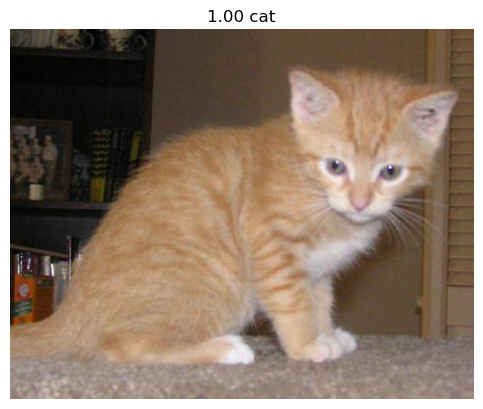

In [10]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

def predecir(ruta):
    img = Image.open(ruta).convert("RGB")
    tensor = transform(img).unsqueeze(0)

    with torch.no_grad():
        out = model(tensor)
        prob = torch.softmax(out,1)
        clase = prob.argmax().item()

    etiquetas = ["cat", "dog"]
    etiqueta = etiquetas[clase]
    p = float(prob[0,clase])

    plt.imshow(img)
    plt.title(f"{p:.2f} {etiqueta}")
    plt.axis("off")
    plt.show()
    
predecir("data/val/cats/cat.4003.jpg")